<a href="https://colab.research.google.com/github/SAVCHink2042/ML-algorithm/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Библиотечная и собственноручно написанная линейная регрессия.

Датасет взял отсюда: https://www.kaggle.com/datasets/canozensoy/multiple-linear-regression-dataset/data

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd

data = pd.read_csv('multiple_linear_regression_dataset.csv', sep=';')

target = data.iloc[:, 2].values
matrix = data.iloc[:, :2].values

matrix = np.hstack((matrix, np.ones((matrix.shape[0], 1)) ))
model = LinearRegression(fit_intercept=False)

model.fit(matrix, target)

coefficients = model.coef_

print("Коэффициенты:", coefficients)
predict= np.dot(matrix, coefficients)
def loss(target, predict):
  return  np.sqrt(1/target.size * np.sum(np.square(target-predict)) )
print("Лосс:", loss(target, predict))

Коэффициенты: [ -416.72218625  1525.50072054 10376.62747228]
Лосс: 744.5474828049679


Коэффициенты: [  80.42589531 1064.27465855  -35.56232801]
6071.331898304798
ЛОСС:   861.3041554477935


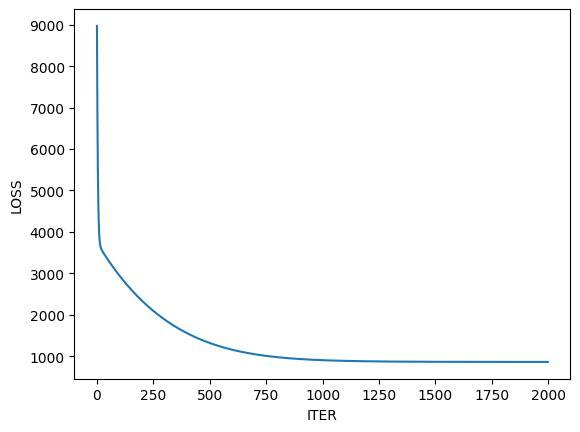

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('multiple_linear_regression_dataset.csv',sep=';')

target = data.iloc[:, 2].values
matrix = data.iloc[:, :2].values

matrix = np.hstack((matrix, np.ones((matrix.shape[0], 1)) ))

for i in range(len(matrix)):
  matrix[i,2]=1
w=[0,0,0]
x=[]
y=[]
def loss(target, predict):
  return  np.sqrt(1/target.size *  np.sum(np.square(target-predict) ) )
def grad(target, matrix, w):
  n_iterations = 2000
  m = len(target)
  for iteration in range(n_iterations):
      learning_rate = 0.0001
      gradients = 2 / m * matrix.T @ ( matrix @ w  - target )

      w -= learning_rate * gradients

      x.append( iteration )
      y.append( loss( target,  matrix @ w ))
  return w

w = grad(target, matrix, w)
print("Коэффициенты:", w)

print(np.dot(matrix[5], w))
plt.xlabel('ITER')
plt.ylabel('LOSS')
plt.plot(x,y)

print("ЛОСС:  ", loss(target, matrix @ w))